# 1. 分析数据

## (1) 导入必要库

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## (2) 导入数据

In [2]:
df_raw = pd.read_csv("datasets/原始数据.csv")

## (3) 观察数据

In [3]:
df_raw

,区县,常住人口（万人）,出生率(‰),GDP（亿元）,义务教育投入,年份,教育财政拨款情况（万元）,高中在校学生人均经费情况（元）,中等职业学校在校学生人均经费情况（元）,初中在校学生人均经费情况（元）,小学在校学生人均经费情况（元）,幼儿园在园幼儿人均经费情况（元）,大学生（万人）,高中生（万人）,初中生（万人）,小学生（万人）,在园幼儿（万人）
0,浦东新区,568.15,NaN,16013.00,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,闵行区,268.88,NaN,2880.11,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.28,6.19
2,宝山区,227.19,4.23,1771.20,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.71,1.88,7.77,5.01
3,松江区,195.45,5.44,1750.12,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.11,3.63,7.52,4.96
4,嘉定区,186.34,NaN,2768.30,NaN,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.94,3.05,6.24,4.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,金山区,80.51,NaN,801.56,109555.5,2016,183658.3,45700.37,35174.54,35921.45,27643.80,29227.79,NaN,NaN,NaN,NaN,NaN
121,松江区,176.48,10.83,1040.45,151387.6,2016,270169.0,47451.67,35627.77,33183.82,22898.00,25242.19,NaN,NaN,NaN,6.06,4.78
122,青浦区,121.49,8.66,940.01,124050.0,2016,205813.7,43136.66,46450.95,33681.62,30738.77,31361.33,NaN,0.57,1.67,3.57,2.53
123,奉贤区,116.74,7.40,729.30,143078.8,2016,214711.5,42102.77,28808.14,36366.51,27035.03,28818.61,NaN,0.60,2.07,3.79,2.68


我们可以用到“常住人口（万人）”、“出生率(‰)”、“GDP（亿元）”、“在园幼儿（万人）”、“小学生（万人）”、“初中生（万人）”这六个特征，同时通过计算获得“义务教育经费（万元）”数据作为模型样本标签。

## (4) 计算义务教育经费

先计算各个阶段的教育经费。

In [4]:
df_raw["幼儿园教育经费（万元）"] = df_raw["幼儿园在园幼儿人均经费情况（元）"] * df_raw["在园幼儿（万人）"]
df_raw["小学教育经费（万元）"] = df_raw["小学在校学生人均经费情况（元）"] * df_raw["小学生（万人）"]
df_raw["初中教育经费（万元）"] = df_raw["初中在校学生人均经费情况（元）"] * df_raw["初中生（万人）"]
df_raw["高中教育经费（万元）"] = df_raw["高中在校学生人均经费情况（元）"] * df_raw["高中生（万人）"]
df_raw[[ "教育财政拨款情况（万元）", "幼儿园教育经费（万元）", "小学教育经费（万元）", "初中教育经费（万元）", \
        "高中教育经费（万元）"]] \
[df_raw["小学教育经费（万元）"].notna() & df_raw["初中教育经费（万元）"].notna()].head()

,教育财政拨款情况（万元）,幼儿园教育经费（万元）,小学教育经费（万元）,初中教育经费（万元）,高中教育经费（万元）
37,506638.42,181431.9820,248979.0204,80959.3610,35115.3344
38,449801.73,188178.0660,211574.7356,149880.5361,57347.5320
39,405118.14,188121.2619,196946.4840,143436.0460,48611.8182
40,347942.26,97909.1764,166036.1505,131238.7266,71632.0938
42,314102.29,98829.7236,123575.5812,89196.3840,36411.3035


再将小学和初中的教育经费相加，获得义务教育经费；并去除缺数据的样本，重置行号，最终用df_curated变量表示。

In [5]:

df_curated = df_raw[["区县","年份","常住人口（万人）","出生率(‰)","GDP（亿元）","在园幼儿（万人）","小学生（万人）",
                     "初中生（万人）","小学教育经费（万元）","初中教育经费（万元）"]]
[df_raw["小学教育经费（万元）"].notna() & df_raw["初中教育经费（万元）"].notna()] 
df_curated["义务教育经费（万元）"] = df_curated["小学教育经费（万元）"] + df_curated["初中教育经费（万元）"]
df_curated.dropna(inplace=True)
df_curated.reset_index(drop=True, inplace=True)
df_curated.head()

,区县,年份,常住人口（万人）,出生率(‰),GDP（亿元）,在园幼儿（万人）,小学生（万人）,初中生（万人）,小学教育经费（万元）,初中教育经费（万元）,义务教育经费（万元）
0,宝山区,2021,225.01,4.43,1725.56,5.35,7.59,1.91,248979.0204,80959.3610,329938.3814
1,松江区,2021,193.88,5.59,1782.28,5.10,7.22,3.33,211574.7356,149880.5361,361455.2717
2,奉贤区,2021,114.71,4.14,1300.00,2.54,3.66,1.92,123575.5812,89196.3840,212771.9652
3,徐汇区,2020,111.31,5.17,2176.73,2.49,4.78,2.97,147392.4472,142103.5110,289495.9582
4,长宁区,2020,69.31,4.69,1561.17,1.25,2.29,1.34,74358.4984,70785.9690,145144.4674


选择合适的列用于构建模型：

In [6]:
df_train = df_curated[["常住人口（万人）","出生率(‰)","GDP（亿元）","在园幼儿（万人）","小学生（万人）",
                     "初中生（万人）","义务教育经费（万元）"]].dropna().reset_index(drop=True)
df_train.head()

,常住人口（万人）,出生率(‰),GDP（亿元）,在园幼儿（万人）,小学生（万人）,初中生（万人）,义务教育经费（万元）
0,225.01,4.43,1725.56,5.35,7.59,1.91,329938.3814
1,193.88,5.59,1782.28,5.10,7.22,3.33,361455.2717
2,114.71,4.14,1300.00,2.54,3.66,1.92,212771.9652
3,111.31,5.17,2176.73,2.49,4.78,2.97,289495.9582
4,69.31,4.69,1561.17,1.25,2.29,1.34,145144.4674


In [7]:
df_train.describe()

,常住人口（万人）,出生率(‰),GDP（亿元）,在园幼儿（万人）,小学生（万人）,初中生（万人）,义务教育经费（万元）
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,148.631087,6.560435,1543.412174,3.587391,4.865435,1.944130,240355.275343
std,57.010882,1.645705,659.335288,1.882391,2.331285,0.570643,79729.986469
min,63.790000,3.620000,295.290000,0.900000,1.550000,1.100000,129333.699400
25%,114.245000,5.275000,1167.987500,2.532500,3.415000,1.620000,179084.907200
50%,128.815000,6.410000,1576.210000,2.685000,4.225000,1.825000,217514.156050
75%,193.152500,7.712500,2082.882500,5.082500,6.555000,2.317500,279529.017625
max,265.350000,10.750000,2608.120000,7.490000,10.300000,3.330000,451621.206000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   常住人口（万人）    46 non-null     float64
 1   出生率(‰)      46 non-null     float64
 2   GDP（亿元）     46 non-null     float64
 3   在园幼儿（万人）    46 non-null     float64
 4   小学生（万人）     46 non-null     float64
 5   初中生（万人）     46 non-null     float64
 6   义务教育经费（万元）  46 non-null     float64
dtypes: float64(7)
memory usage: 2.6 KB


查看目标字段分布：

<AxesSubplot:xlabel='义务教育经费（万元）', ylabel='Density'>

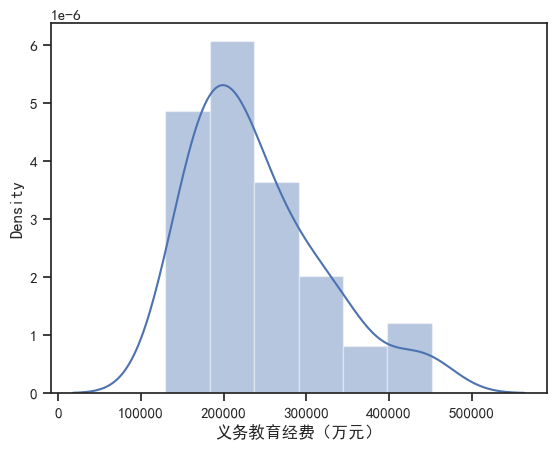

In [9]:
sns.set(font_scale=1.25)
rc = {'font.sans-serif': 'SimHei',
      'axes.unicode_minus': False}
sns.set(context='notebook', style='ticks', rc=rc)
sns.distplot(df_train['义务教育经费（万元）'])

分布偏左，后续会通过自然对数函数进行转换，以尽量服从正态分布。

使用热力图查看字段间的相关性：

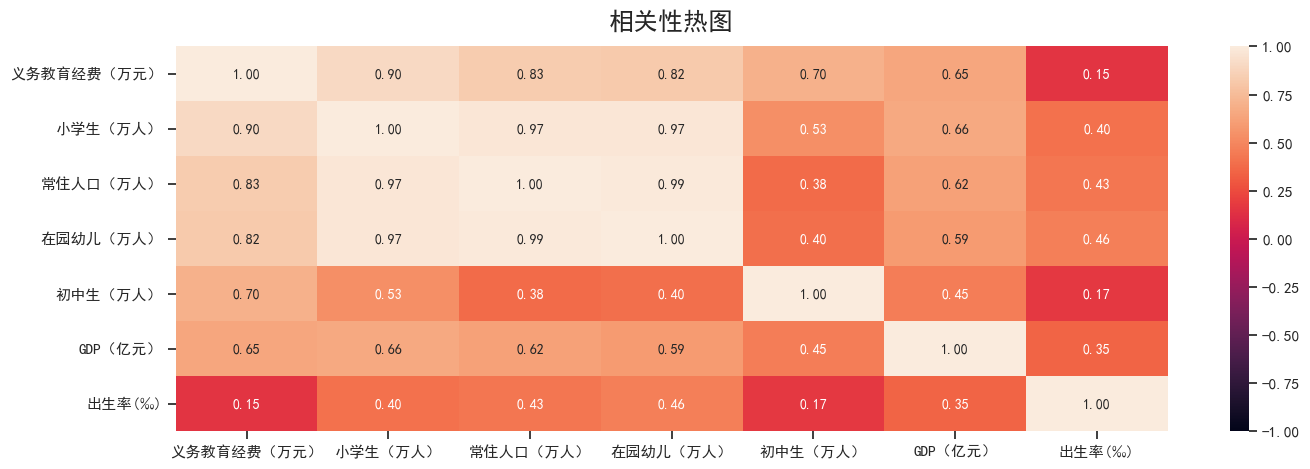

In [10]:
cols = df_train.corr().nlargest(10, '义务教育经费（万元）')['义务教育经费（万元）'].index
cm = np.corrcoef(df_train[cols].values.T)
plt.figure(figsize = (16, 5))
heatmap = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size':10}, vmin=-1, \
                      vmax=1, yticklabels=cols.values, xticklabels=cols.values)
heatmap.set_title('相关性热图', fontdict={'fontsize':18}, pad=12);

颜色越浅表示相关性越强。该热力图显示“义务教育经费（万元）”与其它六个特征都具有较强的相关性。

# 2. 特征工程

## (1) 读取数据

In [11]:
raw_df = df_train

## (2) 尝试对标签列进行转换，使之尽量呈正态分布

<AxesSubplot:xlabel='义务教育经费（万元）', ylabel='Density'>

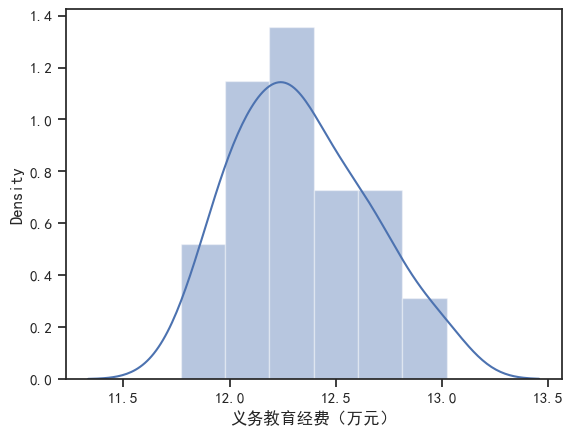

In [12]:
y_train = np.log1p(raw_df['义务教育经费（万元）'])
sns.distplot(y_train)

新增log结果列，并取名为label：

In [13]:
raw_df["label"] = y_train
raw_df.head()

,常住人口（万人）,出生率(‰),GDP（亿元）,在园幼儿（万人）,小学生（万人）,初中生（万人）,义务教育经费（万元）,label
0,225.01,4.43,1725.56,5.35,7.59,1.91,329938.3814,12.706664
1,193.88,5.59,1782.28,5.10,7.22,3.33,361455.2717,12.797896
2,114.71,4.14,1300.00,2.54,3.66,1.92,212771.9652,12.267981
3,111.31,5.17,2176.73,2.49,4.78,2.97,289495.9582,12.575900
4,69.31,4.69,1561.17,1.25,2.29,1.34,145144.4674,11.885492


## (2) 复制出新dataframe，用于特征工程

In [14]:
raw_train_df = raw_df.copy()

## (3) 标准化数据

仅对非标签列进行标准化，使用z-score标准分数。

In [15]:
numeric_cols = raw_train_df.columns[(raw_train_df.dtypes != 'object') \
                                    & (~raw_train_df.columns.isin(['义务教育经费（万元）', 'label']))]
numeric_cols

Index(['常住人口（万人）', '出生率(‰)', 'GDP（亿元）', '在园幼儿（万人）', '小学生（万人）', '初中生（万人）'], dtype='object')

In [16]:
numeric_col_mean = raw_train_df.loc[:, numeric_cols].mean()
numeric_col_std = raw_train_df.loc[:, numeric_cols].std()

In [17]:
numeric_col_mean

常住人口（万人）     148.631087
出生率(‰)         6.560435
GDP（亿元）     1543.412174
在园幼儿（万人）       3.587391
小学生（万人）        4.865435
初中生（万人）        1.944130
dtype: float64

In [18]:
numeric_col_std

常住人口（万人）     57.010882
出生率(‰)        1.645705
GDP（亿元）     659.335288
在园幼儿（万人）      1.882391
小学生（万人）       2.331285
初中生（万人）       0.570643
dtype: float64

In [19]:
raw_train_df.loc[:, numeric_cols] = (raw_train_df.loc[:, numeric_cols] - numeric_col_mean)/numeric_col_std
raw_train_df["label"] = y_train

去除原来的“义务教育经费（万元）”列：

In [20]:
raw_train_df.drop(columns=["义务教育经费（万元）"], inplace=True)
raw_train_df.head()

,常住人口（万人）,出生率(‰),GDP（亿元）,在园幼儿（万人）,小学生（万人）,初中生（万人）,label
0,1.339725,-1.294542,0.276260,0.936367,1.168697,-0.059810,12.706664
1,0.793689,-0.589677,0.362286,0.803557,1.009986,2.428610,12.797896
2,-0.594993,-1.470758,-0.369178,-0.556415,-0.517069,-0.042286,12.267981
3,-0.654631,-0.844887,0.960540,-0.582977,-0.036647,1.797743,12.575900
4,-1.391332,-1.136555,0.026933,-1.241714,-1.104728,-1.058683,11.885492


# 3. 建立模型

## (1) 准备样本

In [21]:
revised_train_df = raw_train_df.copy()

from sklearn.model_selection import train_test_split
#revised_train_df, revised_test_df = train_test_split(verify_df, test_size=0.2)
_, revised_test_df = train_test_split(raw_train_df, test_size=0.2)

y_train = revised_train_df.pop("label")
revised_train_df.head()

,常住人口（万人）,出生率(‰),GDP（亿元）,在园幼儿（万人）,小学生（万人）,初中生（万人）
0,1.339725,-1.294542,0.276260,0.936367,1.168697,-0.059810
1,0.793689,-0.589677,0.362286,0.803557,1.009986,2.428610
2,-0.594993,-1.470758,-0.369178,-0.556415,-0.517069,-0.042286
3,-0.654631,-0.844887,0.960540,-0.582977,-0.036647,1.797743
4,-1.391332,-1.136555,0.026933,-1.241714,-1.104728,-1.058683


输出测试样本，便于直观观察模型计算结果：

In [22]:
y_test = revised_test_df.pop("label")
revised_test_df

,常住人口（万人）,出生率(‰),GDP（亿元）,在园幼儿（万人）,小学生（万人）,初中生（万人）
6,2.047309,-0.352697,1.549148,1.701351,2.331146,1.499833
10,-0.376965,-0.796275,-0.529931,-0.407668,-0.615727,-0.287624
42,0.163634,1.445924,0.816804,-0.009239,-0.075252,-1.058683
0,1.339725,-1.294542,0.276260,0.936367,1.168697,-0.059810
44,-0.559386,0.510155,-1.234747,-0.482042,-0.461306,0.220575
38,-0.702867,1.676828,-0.032218,-0.620164,-0.324042,0.833918
13,-0.687081,-0.170404,0.860864,-0.593602,-0.126726,1.534881
39,-0.310311,1.178562,0.144764,-0.535166,-0.645753,-0.059810
15,1.864537,0.570919,1.482414,1.887285,2.138120,1.342116
14,-0.318204,-0.516760,0.818670,-0.497979,-0.375516,0.483436


In [23]:
y_train.head()

0    12.706664
1    12.797896
2    12.267981
3    12.575900
4    11.885492
Name: label, dtype: float64

# (2) 线性回归

我们选取岭回归（Ridge Regression）。

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

通过cross_val_score选择超参alpha。

In [25]:
alphas = np.logspace(-2, 1, 20)
alphas

array([ 0.01      ,  0.0143845 ,  0.02069138,  0.02976351,  0.04281332,
        0.06158482,  0.08858668,  0.1274275 ,  0.18329807,  0.26366509,
        0.37926902,  0.54555948,  0.78475997,  1.12883789,  1.62377674,
        2.33572147,  3.35981829,  4.83293024,  6.95192796, 10.        ])

In [26]:
X_train = revised_train_df.values
test_scores=[]
for alpha in alphas:
    ridge_es = Ridge(alpha)
    test_score = np.sqrt(-cross_val_score(ridge_es, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5, 1.0, 'Alphas vs cv Error')

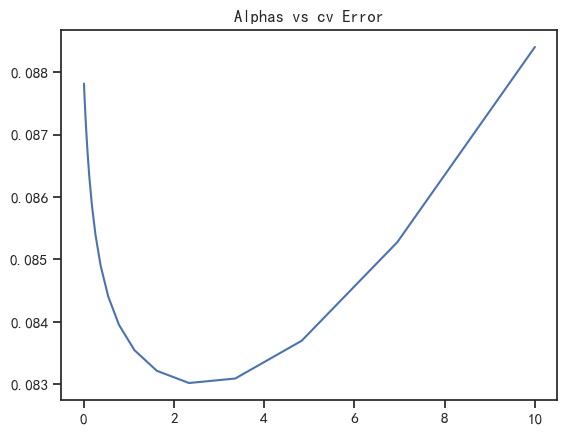

In [27]:
plt.plot(alphas, test_scores)
plt.title('Alphas vs cv Error')

In [28]:
minpos = test_scores.index(min(test_scores))
print(alphas[minpos])

2.3357214690901213


由上图可知超参alphas取2.34时错误率最低。

## (3) 非线性回归

我们选择随机森林（Random Forest）。

In [29]:
from sklearn.ensemble import RandomForestRegressor

随机森林由多个超参，我们通过GridSearchCV进行网格搜索。

In [30]:
from sklearn.model_selection import GridSearchCV
parameters = [
    {'n_estimators': [5, 10, 20, 30, 40, 60, 100], 'max_features': [1, 2, 3, 4, 5, 6]}
  ]
rf_es = RandomForestRegressor(random_state=20)
grid_search = GridSearchCV(rf_es, parameters, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_features': 5, 'n_estimators': 40}

由结果可知，超参n_estimators=40, max_features=5时错误率最低。画图确认下。

Text(0.5, 1.0, 'n_estimators & max_features vs CV Error')

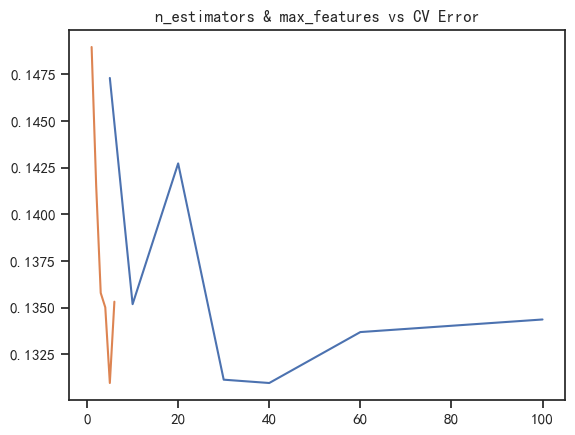

In [31]:
n_estimators = [5, 10, 20, 30, 40, 60, 100]
test_scores = []
for n in n_estimators:
    rf_es = RandomForestRegressor(n_estimators=n, max_features=5, random_state=20)
    test_score = np.sqrt(-cross_val_score(rf_es, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(n_estimators, test_scores)
plt.title("n_estimator vs CV Error")

max_features = [1, 2, 3, 4, 5, 6]
test_scores = []
for m in max_features:
    rf_es = RandomForestRegressor(n_estimators=40, max_features=m, random_state=20)
    test_score = np.sqrt(-cross_val_score(rf_es, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
plt.plot(max_features, test_scores)
plt.title("n_estimators & max_features vs CV Error")

从上图可知，通过GridSearchCV进行网格搜索的确可以获得最有的超参。

## (4) 集成学习

通过集成两个模型的预测值取平均值，以提高泛化能力。

In [32]:
ridge = Ridge(alpha=2.34)
rf = RandomForestRegressor(n_estimators=40, max_features=5)
ridge.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=5, n_estimators=40)

验证测试样本：

In [33]:
X_test = revised_test_df.values
train_score_ridge = ridge.score(X_train, y_train)
test_score_ridge = ridge.score(X_test, y_test)
print(f"岭回归训练集预测分数{train_score_ridge}，测试集预测分数{test_score_ridge}")

train_score_rf = rf.score(X_train, y_train)
test_score_rf = rf.score(X_test, y_test)
print(f'随机森林训练集预测分数{train_score_rf}，测试集预测分数{test_score_rf}')

ridge_predict = ridge.predict(X_test)
rf_predict = rf.predict(X_test)
y_ridge = np.expm1(ridge_predict)
y_rf = np.expm1(rf_predict)

岭回归训练集预测分数0.940256241614267，测试集预测分数0.9472524290790731
随机森林训练集预测分数0.9883370680621569，测试集预测分数0.9930373239202599


使用两模型预测值的均值作为最终预测值，并计算R^2分值：

In [34]:
y_final = (y_ridge+y_rf)/2
y_test_ori = np.expm1(y_test.values)
from sklearn.metrics import mean_squared_error, r2_score
print("根均方误差(RMSE)：{}".format(np.sqrt(mean_squared_error(y_test_ori, y_final))))
print("R^2 score：{}".format(r2_score(y_test_ori, y_final)))

根均方误差(RMSE)：11341.154284620738
R^2 score：0.9869077354484008


## (5) 比对预测结果

构建验证集：

In [35]:
df_final = df_curated.copy()
verify_df = raw_train_df.copy()
verify_df.drop(columns=["label"], inplace=True)
X_verify = verify_df.values
ridge_predict = ridge.predict(X_verify)
rf_predict = rf.predict(X_verify)
y_ridge = np.expm1(ridge_predict)
y_rf = np.expm1(rf_predict)
y_final = (y_ridge+y_rf)/2

计算预测差额及百分比：

In [36]:
df_final['预测义务教育经费（万元）'] = y_final.tolist()
df_final['预测差额（万元）'] = df_final['义务教育经费（万元）'] - df_final['预测义务教育经费（万元）']
df_final['预测差额百分比'] = df_final['预测差额（万元）'] / df_final['义务教育经费（万元）'] * 100
df_final.head()

,区县,年份,常住人口（万人）,出生率(‰),GDP（亿元）,在园幼儿（万人）,小学生（万人）,初中生（万人）,小学教育经费（万元）,初中教育经费（万元）,义务教育经费（万元）,预测义务教育经费（万元）,预测差额（万元）,预测差额百分比
0,宝山区,2021,225.01,4.43,1725.56,5.35,7.59,1.91,248979.0204,80959.3610,329938.3814,325685.832781,4252.548619,1.288892
1,松江区,2021,193.88,5.59,1782.28,5.10,7.22,3.33,211574.7356,149880.5361,361455.2717,367465.858488,-6010.586788,-1.662885
2,奉贤区,2021,114.71,4.14,1300.00,2.54,3.66,1.92,123575.5812,89196.3840,212771.9652,217314.267206,-4542.302006,-2.134822
3,徐汇区,2020,111.31,5.17,2176.73,2.49,4.78,2.97,147392.4472,142103.5110,289495.9582,286155.853132,3340.105068,1.153766
4,长宁区,2020,69.31,4.69,1561.17,1.25,2.29,1.34,74358.4984,70785.9690,145144.4674,163612.931106,-18468.463706,-12.724194


## (5) 各区各年份义务教育经费多寡走势分析

In [37]:
year_min = df_final['年份'].min()
year_max = df_final['年份'].max()
years = year_max - year_min + 1
districts = df_final['区县'].unique()
districts_count = len(districts)

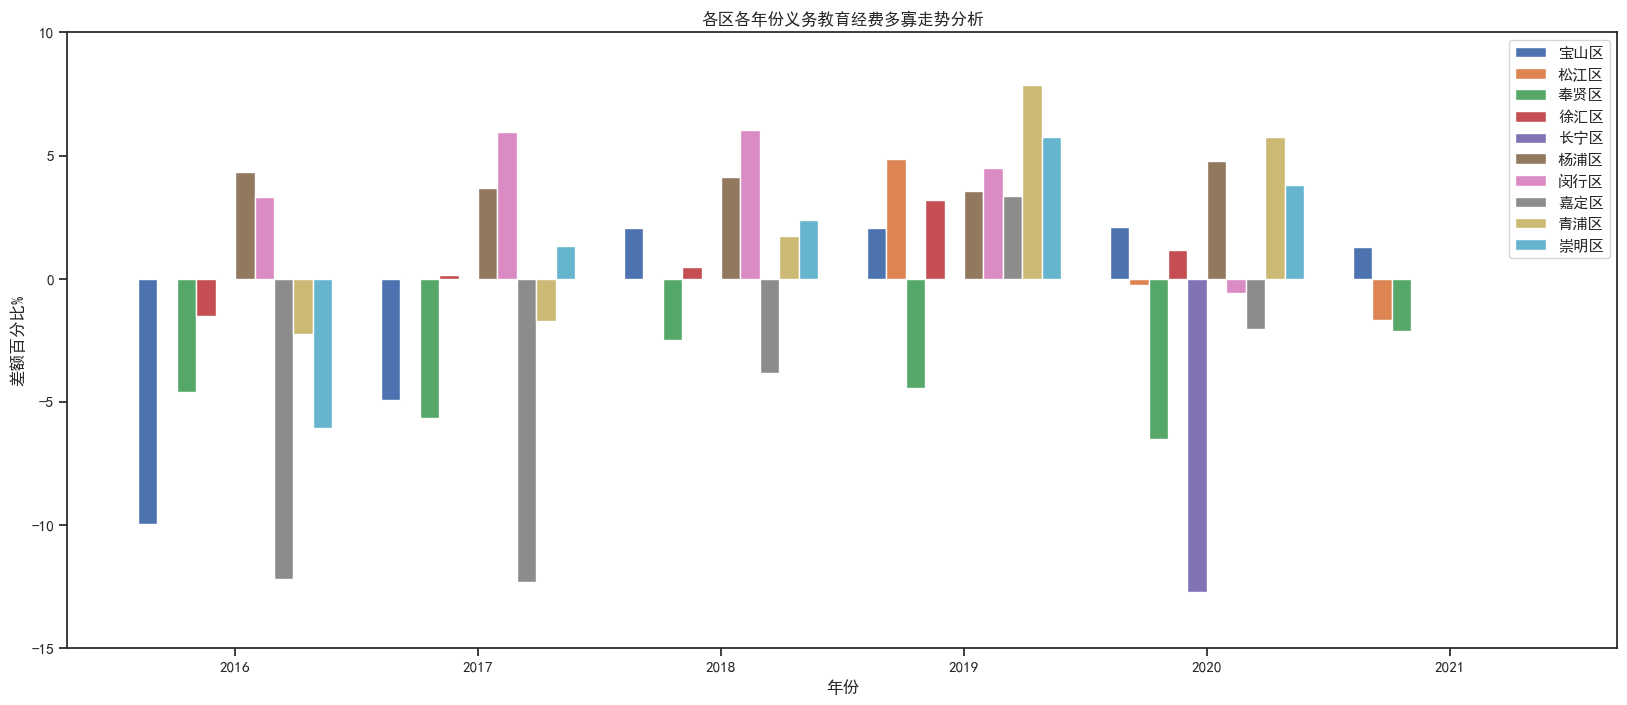

In [38]:
total_width = 0.8
width = total_width / districts_count
x = np.arange(years)
x = x - (total_width - width) / 2 + year_min

fig, ax = plt.subplots(figsize=(20,8))
ax.set(ylabel='差额百分比%',xlabel='年份', title='各区各年份义务教育经费多寡走势分析', ylim=(-15, 10))

for idx, dist in enumerate(districts):
    dist_values = [0] * years
    for y_idx in range(years):
        year = year_min + y_idx
        row = df_final[(df_final['区县'] == dist) & (df_final['年份'] == year)]['预测差额百分比'].values
        dist_values[y_idx] = row[0] if len(row) > 0 else 0
    
    bar_container = ax.bar(x + width * idx, dist_values,  width=width, label=dist)
    
plt.legend()
plt.show()

# 分析结论

1. 杨浦、闵行的义务教育经费持续较高。嘉定、奉贤经费持续较低。徐汇、青浦、崇明经费近年有所提升。松江经费近年有所降低。
2. 中心城区的数据偏少。最近两年的数据缺失。可以进一步完善。


# 参考链接

皮尔逊积矩相关系数： https://zh.wikipedia.org/zh-hans/%E7%9A%AE%E5%B0%94%E9%80%8A%E7%A7%AF%E7%9F%A9%E7%9B%B8%E5%85%B3%E7%B3%BB%E6%95%B0

z-score标准化分数： https://zh.wikipedia.org/zh-hans/%E6%A8%99%E6%BA%96%E5%88%86%E6%95%B8

numpy.logspace: https://numpy.org/doc/stable/reference/generated/numpy.logspace.html

cross_val_score: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

GridSearchCV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Ridge： https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

RandomForestRegressor：https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

R2_score： https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html